In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms
import seaborn as sns

In [2]:
#Importing the dataset
dataset = pd.read_excel('multi_reg.xlsx')
dataset

,Local Authorities,Clean envir/mean total pop,Health training/mean total pop,Mean ratio of obesity
0,London Borough,0.201198,0.074031,0.002670
1,Μetropolitan Borough,0.315727,0.105371,0.003823
2,Νon metropolitan county,0.517183,0.204552,0.003167
3,Οther London,0.001161,0.000774,0.001436
4,Unitary Authority,0.306182,0.107564,0.003446


In [3]:
data = np.genfromtxt(dataset,delimiter = ',')

In [6]:
# Extracting the y-values and the x-values from the data:
x_values = dataset.iloc[:, 1:-1].values
y_values = dataset.iloc[:, -1].values
print(x_values)
print(y_values)

[[0.20119826 0.07403064]
 [0.31572651 0.10537114]
 [0.51718272 0.20455157]
 [0.00116076 0.00077384]
 [0.30618249 0.10756369]]
[0.00267026 0.00382317 0.00316665 0.00143649 0.00344598]


In [7]:
# Regression procedure with confidence interval alpha=0.05:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary(alpha=0.05))
print()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 16 Nov 2020   Prob (F-statistic):            0.00649
Time:                        15:57:04   Log-Likelihood:                 40.990
No. Observations:                   5   AIC:                            -75.98
Df Residuals:                       2   BIC:                            -77.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015   9.48e-05     15.999      0.0

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [8]:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

In [9]:
# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)

predictor coefficients = [ 0.03016825 -0.06807609]
constant               = 0.0015173117137567286
Rsquared               = 0.993508261759247
MSE                    = 1.1086920730610687e-08
T-test pvalues         = [0.00628368 0.0080895 ]
F-test pvalue          = 0.006491738240752984


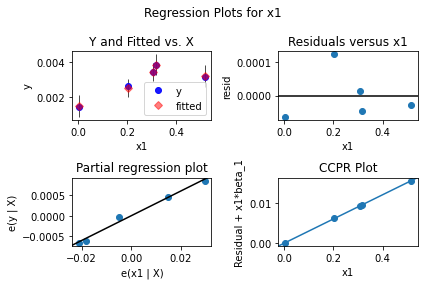

In [11]:
fig = sms.graphics.plot_regress_exog(regression_model_b, "x1")
fig.tight_layout()
fig.savefig('regressionplotx1')

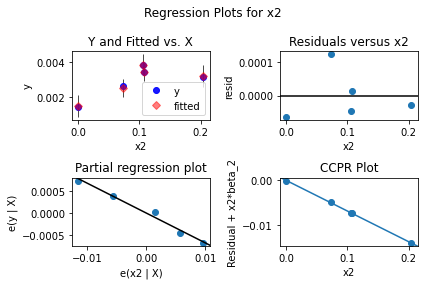

In [13]:
fig = sms.graphics.plot_regress_exog(regression_model_b, "x2")
fig.tight_layout()
fig.savefig('regressionplotx2')

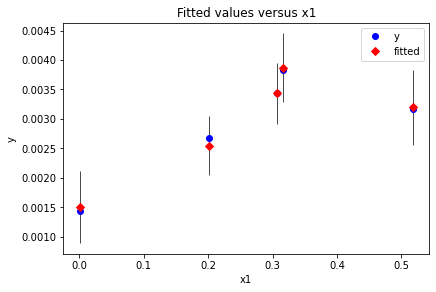

In [14]:
from statsmodels.graphics.gofplots import qqplot_2samples
fig = sms.graphics.plot_fit(regression_model_b, "x1")
fig.tight_layout(pad=0.5)

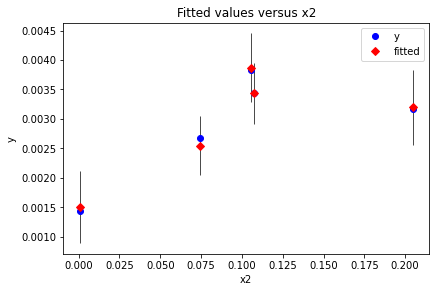

In [15]:
fig = sms.graphics.plot_fit(regression_model_b, "x2")
fig.tight_layout(pad=0.5)

<AxesSubplot:xlabel='Clean envir/mean total pop', ylabel='Mean ratio of obesity'>

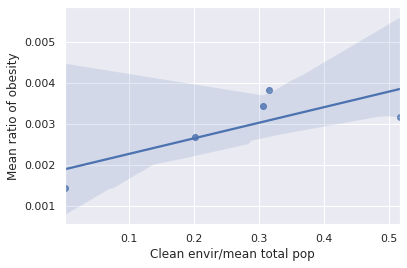

In [16]:
sns.set_theme(color_codes=True)
sns.regplot(x="Clean envir/mean total pop", y="Mean ratio of obesity", data=dataset)

<AxesSubplot:xlabel='Health training/mean total pop', ylabel='Mean ratio of obesity'>

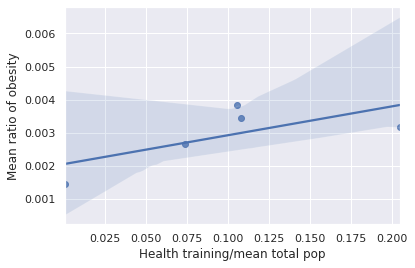

In [17]:
sns.regplot(x='Health training/mean total pop', y="Mean ratio of obesity", data=dataset)